# 将词向量可视化

# 导入依赖库

In [2]:
import pandas as pd
from gensim.models import Word2Vec
from gensim.models.word2vec import LineSentence
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import logging
from matplotlib.font_manager import FontProperties

# 打开文件并生成模型

In [4]:
pd.options.mode.chained_assignment = None
font = FontProperties(fname=r"c:\windows\fonts\simsun.ttc", size=14)#字体格式及大小

logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

news = open('..\Word2VecTest\data\Seg_The_Smiling_Proud_Wanderer.txt', 'r', encoding='utf-8')

model = Word2Vec(LineSentence(news), sg=0, size=200, window=10, min_count=40, workers=6)#训练生成词向量模型
print('模型训练完成')

2020-08-31 10:22:47,999 : INFO : collecting all words and their counts
2020-08-31 10:22:48,026 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2020-08-31 10:22:48,140 : INFO : PROGRESS: at sentence #10000, processed 67082 words, keeping 17056 word types
2020-08-31 10:22:48,248 : INFO : PROGRESS: at sentence #20000, processed 133891 words, keeping 27033 word types
2020-08-31 10:22:48,277 : INFO : PROGRESS: at sentence #30000, processed 200717 words, keeping 34567 word types
2020-08-31 10:22:48,307 : INFO : PROGRESS: at sentence #40000, processed 267777 words, keeping 40489 word types
2020-08-31 10:22:48,310 : INFO : collected 41043 word types from a corpus of 272481 raw words and 40664 sentences
2020-08-31 10:22:48,311 : INFO : Loading a fresh vocabulary
2020-08-31 10:22:48,324 : INFO : effective_min_count=40 retains 1088 unique words (2% of original 41043, drops 39955)
2020-08-31 10:22:48,325 : INFO : effective_min_count=40 leaves 130337 word corpus (47% of o

模型训练完成


# 可视化

D:\ANACONDA\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


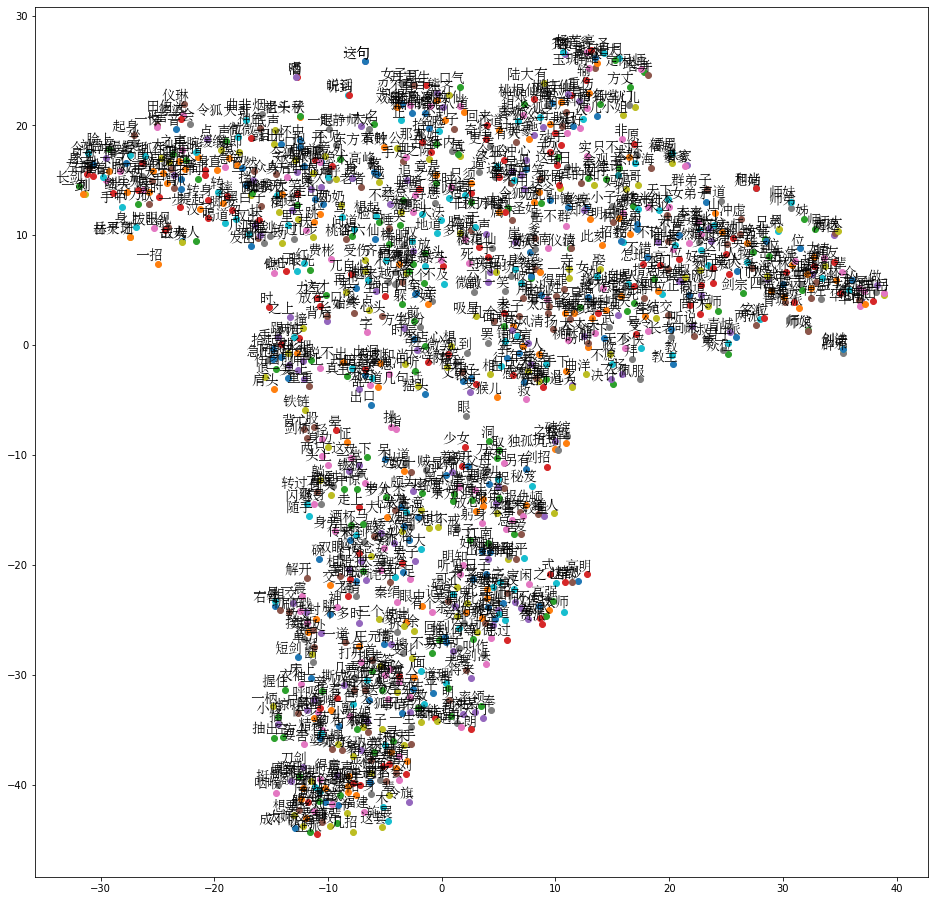

In [5]:
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []
    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)

    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=1000, random_state=20)
    new_values = tsne_model.fit_transform(tokens)
    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])

    plt.figure(figsize=(16, 16))
    for i in range(len(x)):
        plt.scatter(x[i], y[i])
        plt.annotate(labels[i],
                     fontproperties=font,
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

tsne_plot(model)